In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [61]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [62]:
results = pd.read_csv('popevents_dynamic', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [63]:
results = results.fillna(0)

In [64]:
domains

[418, 694, 1677, 35774]

In [65]:
results

,ranker,day,domain,correct,total,precision,recall
0,poprank_event,1,418,6940,8673,0.800184,0.039427
1,poprank_event,1,3336,0,2,0.000000,0.000000
2,poprank_event,1,694,384,546,0.703297,0.180000
3,poprank_event,1,1677,20870,26287,0.793929,0.042035
4,poprank_event,1,596,0,0,0.000000,0.000000
5,poprank_event,1,13554,0,0,0.000000,0.000000
6,poprank_event,1,35774,38006,60688,0.626252,0.076125
7,poprank_event,1,2522,0,0,0.000000,0.000000
8,poprank_event,2,418,7135,8958,0.796495,0.046980
9,poprank_event,2,3336,0,1,0.000000,0.000000


In [66]:
linestyles = [[8, 4, 2, 4, 2, 4],[2, 2, 2, 2, 2, 2], [4, 8, 4, 1, 1, 1], [10, 10], [5, 10, 20, 10]]

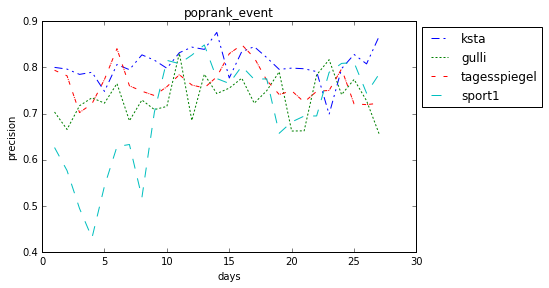

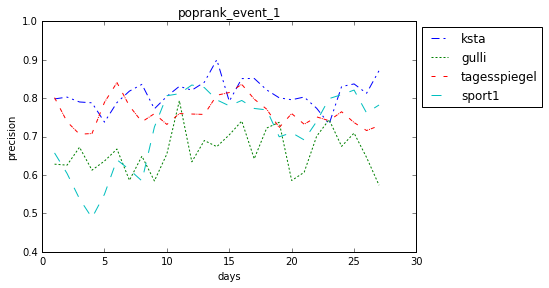

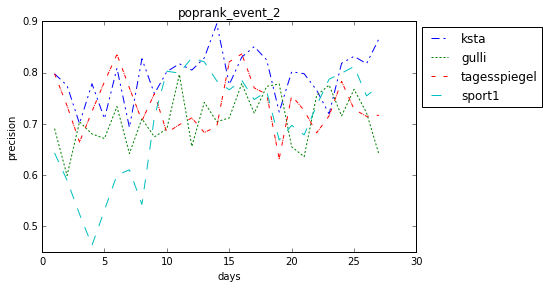

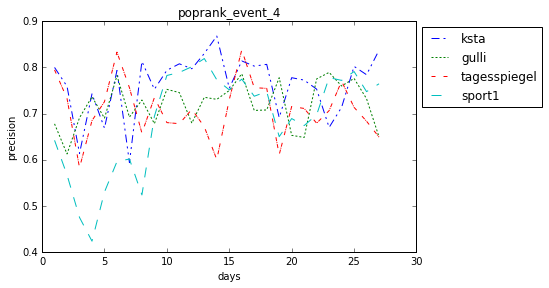

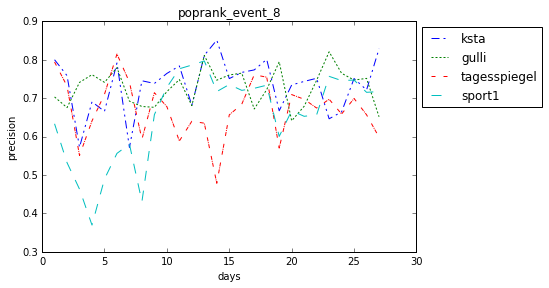

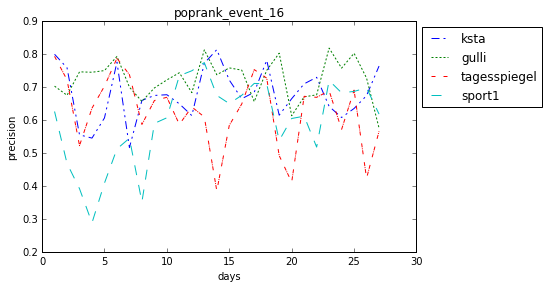

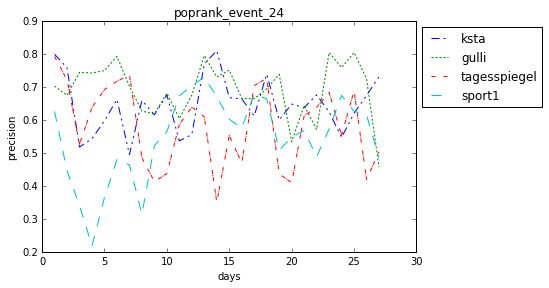

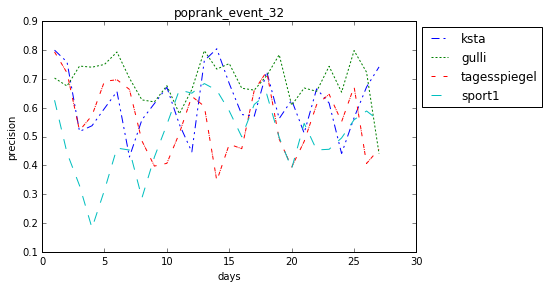

In [67]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    j = 0
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.65,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, dashes=linestyles[j])
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)
        j = j + 1


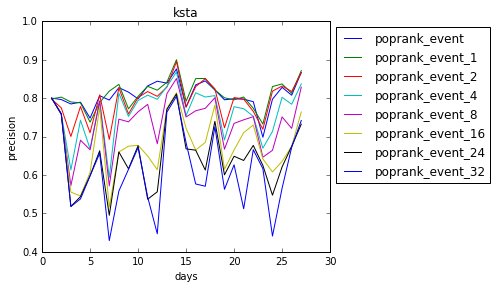

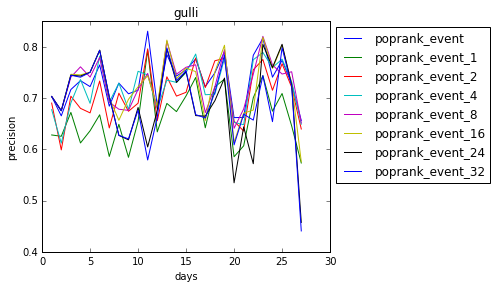

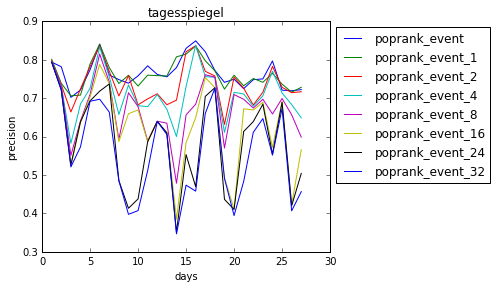

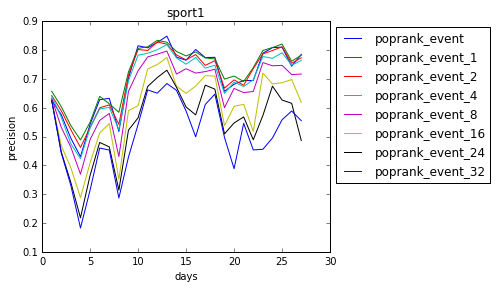

In [69]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
#         ax.plot(days, precision, dashes=linestyles[j])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1
        

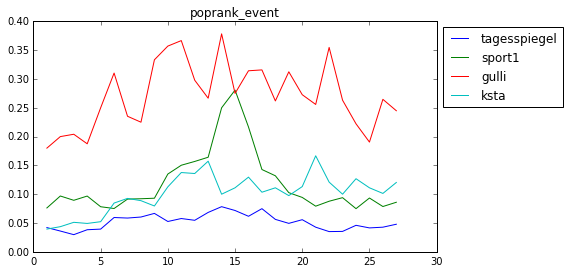

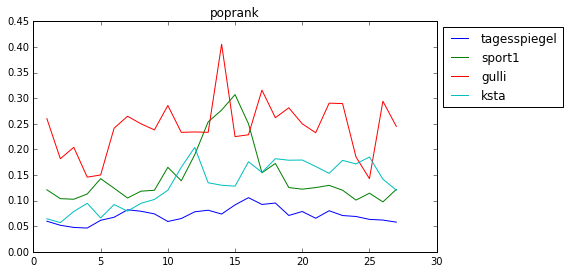

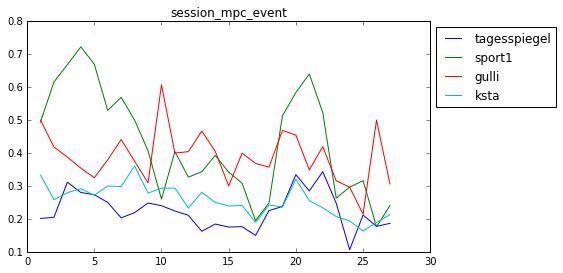

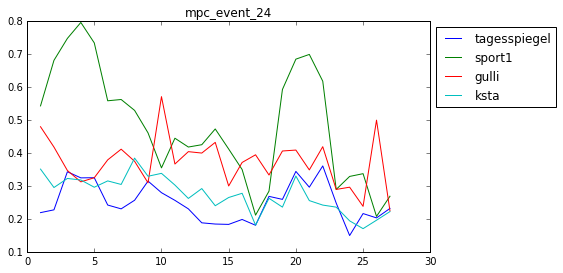

In [44]:
#recall per ranker
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1_recall.png' % ranker)

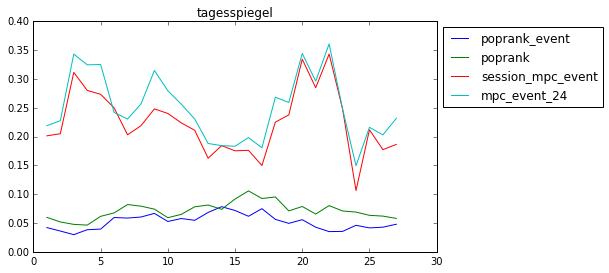

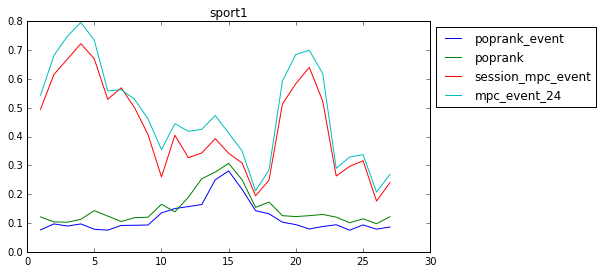

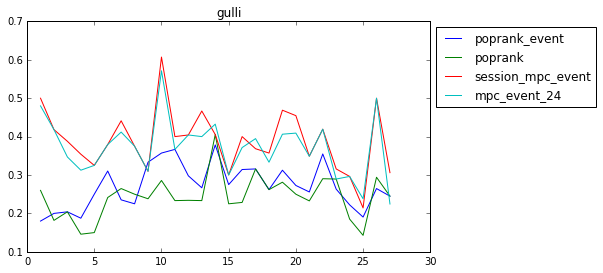

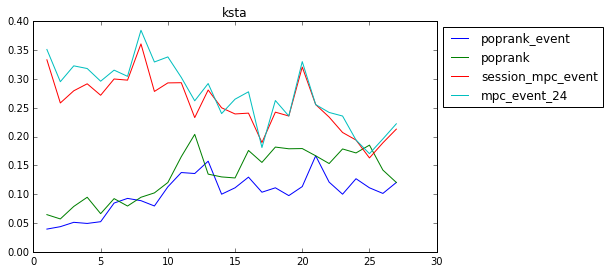

In [45]:
#recall per domain
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)

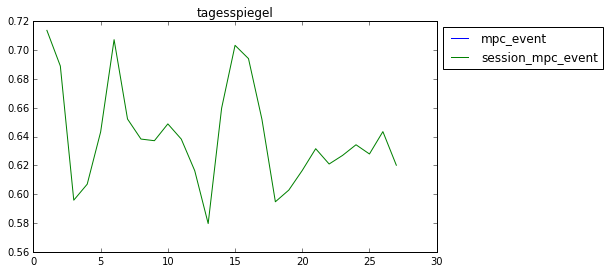

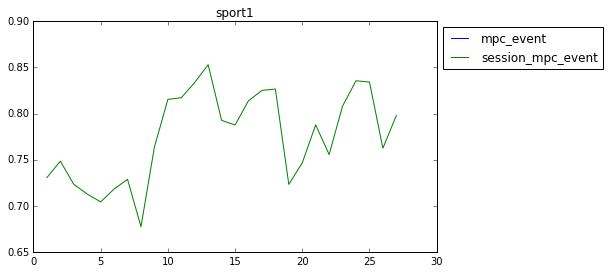

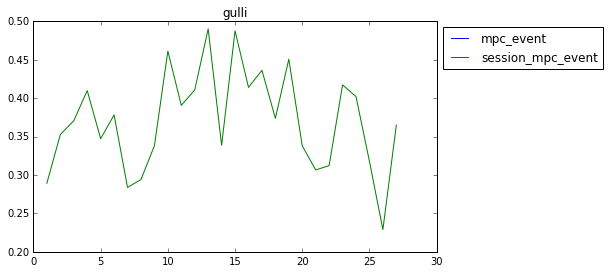

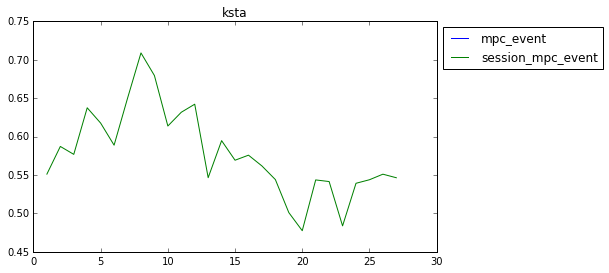

In [46]:
i=0
rankers = ['mpc_event', 'session_mpc_event']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_event_%s.png' % domain)

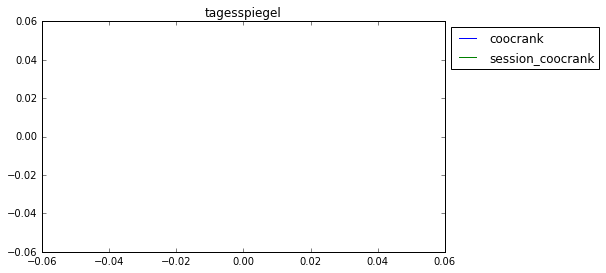

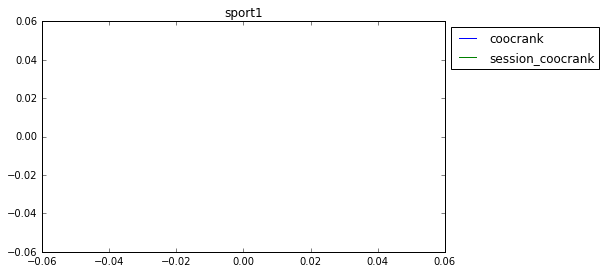

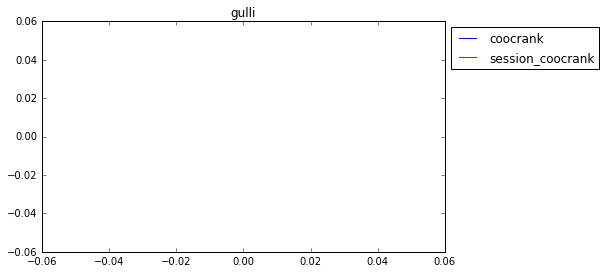

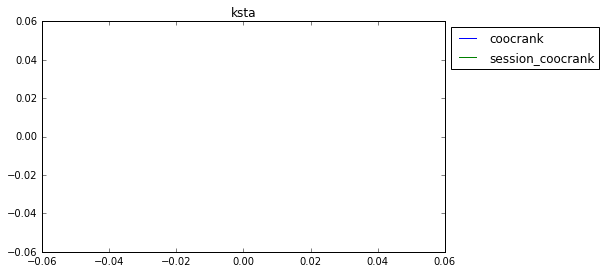

In [47]:
i=0
rankers = ['coocrank', 'session_coocrank']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_coocrank_%s.png' % domain)

In [73]:

import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['precision']
        print(domain_mapping[domain], ranker, np.mean(recall.values))
        

ksta poprank_event 0.807943378047
ksta poprank_event_1 0.811300878681
ksta poprank_event_2 0.793334372453
ksta poprank_event_4 0.763520925276
ksta poprank_event_8 0.734440620921
ksta poprank_event_16 0.678527622835
ksta poprank_event_24 0.646454550546
ksta poprank_event_32 0.617092574505
gulli poprank_event 0.733680408234
gulli poprank_event_1 0.662813979141
gulli poprank_event_2 0.708187196576
gulli poprank_event_4 0.720162937446
gulli poprank_event_8 0.72857262556
gulli poprank_event_16 0.723632407346
gulli poprank_event_24 0.691535237899
gulli poprank_event_32 0.692087254986
tagesspiegel poprank_event 0.76475516092
tagesspiegel poprank_event_1 0.761178025998
tagesspiegel poprank_event_2 0.736402396161
tagesspiegel poprank_event_4 0.709587238563
tagesspiegel poprank_event_8 0.671489476854
tagesspiegel poprank_event_16 0.627548107806
tagesspiegel poprank_event_24 0.583644332457
tagesspiegel poprank_event_32 0.5588499057
sport1 poprank_event 0.704132686895
sport1 poprank_event_1 0.7187

In [70]:
import numpy as np
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
    print(ranker, np.mean(recall.values))

poprank_event 0.137035157467
poprank_event_1 0.167427698907
poprank_event_2 0.159083170028
poprank_event_4 0.149307274188
poprank_event_8 0.137597723295
poprank_event_16 0.128815111502
poprank_event_24 0.121607916539
poprank_event_32 0.117804034671


In [71]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
    print(ranker, np.mean(precision.values))

poprank_event 0.752627908524
poprank_event_1 0.738522101886
poprank_event_2 0.735582784664
poprank_event_4 0.720463534289
poprank_event_8 0.697453917209
poprank_event_16 0.656990078898
poprank_event_24 0.616846662457
poprank_event_32 0.593045597383
